## Machine Learning Tutorial: From Data Cleaning to Classification

In this MACHINE LEARNING tutorial, we will cover a full machine learning pipeline using the breast cancer dataset from scikit-learn for classification task. Here we are creating a model that classifies the features from breast cancer dataset into two classes, 0 or 1 (class labels).  To know the basics of Machine Learning, refer **[here](https://guides.library.sc.edu/c.php?g=1430013&p=10626775)**.

In [ ]:
# install the ML library, scikit-learn
%pip install scikit-learn

#### Step 1: Import libraries 

In [ ]:
# data anaysis packages
import pandas as pd
import numpy as np

# Plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

#Built-in dataset in sci-kit learn (sklearn), breast cancer dataset
from sklearn.datasets import load_breast_cancer

#### Step 2: Load and explore the data

In [ ]:
# load the dataset and store it in the pandas dataframe df with column names (X) =feature names and target (y) ic column "target"
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Preview the dataset
print(df.head()) # print first 5 rows of the data


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

##### find the number of rows and columns, column names, and datatype of columns

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

- The data has 569 rows and 31 columns
- except "target" column, all the columns are float


#### Step 3: Data cleaning

In [ ]:
# to check for missing values in each column
print(df.isnull().sum())

# Use imputer if missing values were present
# imputer = SimpleImputer(strategy="mean")
# df.iloc[:, :-1] = imputer.fit_transform(df.iloc[:, :-1])

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


This data has no missing values in any column

#### Step 4: Exploratory Data Analysis (EDA)

In [ ]:
# find the summary statistics of all the numerical features
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


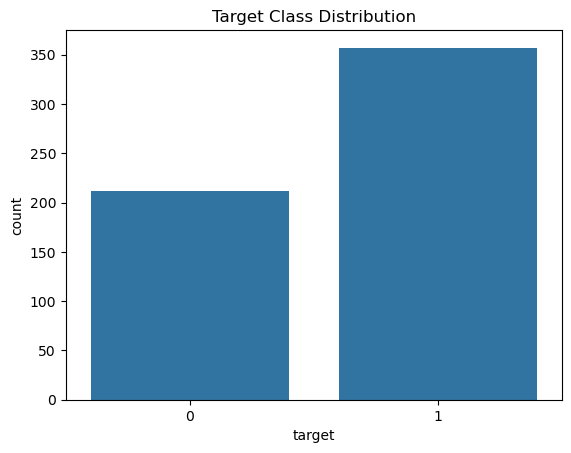

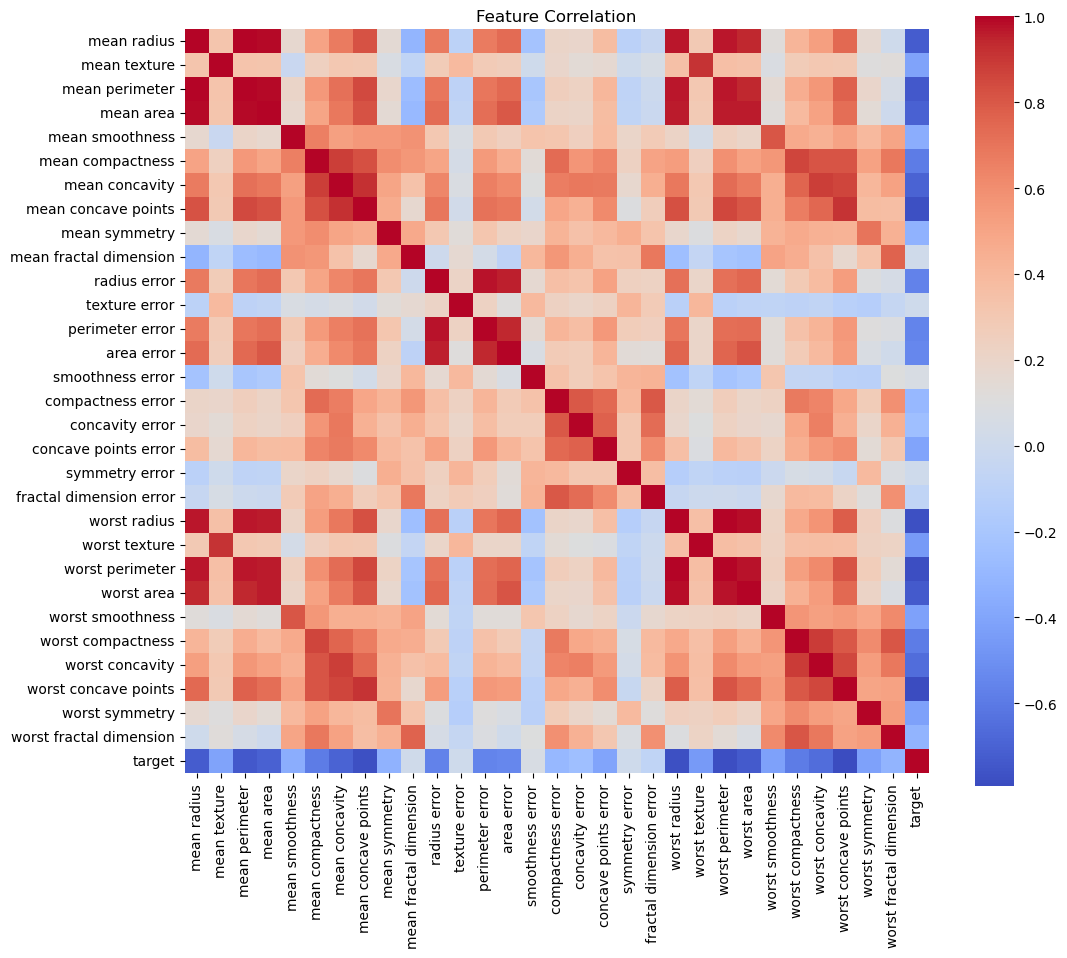

In [ ]:
# Plot the number of classes in target variable (column y)
sns.countplot(x='target', data=df)
plt.title('Target Class Distribution')
plt.show()

# plot heatmap of correlation between all the features of dataset df; we are interested in the correlation between the features (X)
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', square=True)
plt.title('Feature Correlation')
plt.show()

- The darker red color shows the high correlation between features. At this point, we may discard one of the two highly correlated features and do further analysis.
- Here we check if the two classed are represented approximately equally. If this representation is very skewed towards any one class, we rebalance it using techniques like **[SMOTE](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)**.

#### Step 5: Split the data randomly into training and testing set

In [ ]:
# Choose all columns of the dataframe except the "target" column as X(input) and "target" column as y(output)
X = df.drop('target', axis=1)
y = df['target']

#Randomly split the data into training an test set in the ratio of 80%(training) and 20% (testing); could be 70/30 or 75/25 also
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Step 6: Feature Scaling

Numerical value of feature may be of different magnitudes (for example, max value of  "mean smoothness" is 0.163400 wheras max value "mean area" is 2501.00. Hence, we scale the features to transform them to a similar scale (between 0 and 1), so the feature with high numerical values does not dominate the model creation.

Only feature values are scaled, NOT the target values.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Step 7: Train a Classifier 

For example, **[Random Forest](https://scikit-learn.org/stable/modules/ensemble.html#), [Decision Tree](https://scikit-learn.org/stable/modules/tree.html), [logistic Regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression), [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html), [XgBoost](https://scikit-learn.org/stable/modules/ensemble.html#)**, and many more

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

#### Step 8: Evaluate the Model

Some important metrics: precision, recall, accuracy, f1-score

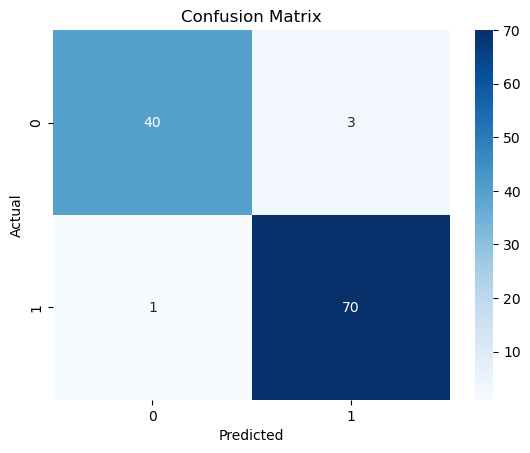

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
#Calculate the predicted value of y (y_pred) using model
y_pred = model.predict(X_test_scaled) 

# Evaluate the model and print evaluation metrics
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))

The accuracy of the model is 96%